In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
#pd.set_option('display.max_rows', None)
def f(t, X):
    return np.array(
        [0.0001 * X * (p - X)]
    )

def RK(
        a=0.0,
        b=5.0,
        p=200000,
        m=100000,
        n=1
):
    h = (b - a) / m
    y = np.zeros((m + 1, n))
    y[0] = [0.0001 * p]
    x = np.arange(a, b + h, h)
    tabela = np.zeros((m + 1, n + 1))
    tabela[0] = np.array([x[0], y[0][0]])

    #0.0001
    for i in range(m):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + k1 * h / 2)
        k3 = f(x[i] + h / 2, y[i] + k2 * h / 2)
        k4 = f(x[i] + h, y[i] + k3 * h)
        k = (k1 + 2 * (k2 + k3) + k4) / 6
        y[i + 1] = y[i] + h * k
        tabela[i + 1] = np.array([x[i + 1], y[i + 1][0]])
        if y[i + 1] > 0.5 * p and y[i] < 0.5 * p:
            s1 = tabela[i+1]
        if y[i + 1] > 0.9 * p and y[i] < 0.9 * p:
            s2 = tabela[i+1]
    return tabela,s1,s2

In [15]:
p=20000
m=20000
b=10
tabela, s1,s2 = RK(m=m,p=p,b=b)

In [16]:
print(" Solução  1 : [  t_i   x_i ] = ", s1)
print(" Solução  2 : [  t_i   x_i ] = ", s2)

 Solução  1 : [  t_i   x_i ] =  [4.60550000e+00 1.00037982e+04]
 Solução  2 : [  t_i   x_i ] =  [5.70400000e+00 1.80009629e+04]


In [17]:
tabela_data={
    't_i':tabela[:,0],
    'x_i': tabela[:,1]
}
tabela_frame= pd.DataFrame(tabela_data)
print(tabela_frame)

#tabela_frame.to_csv('dados2.csv',sep=';')

           t_i           x_i
0       0.0000      2.000000
1       0.0005      2.002001
2       0.0010      2.004004
3       0.0015      2.006008
4       0.0020      2.008015
...        ...           ...
19996   9.9980  19999.586167
19997   9.9985  19999.586581
19998   9.9990  19999.586994
19999   9.9995  19999.587407
20000  10.0000  19999.587819

[20001 rows x 2 columns]


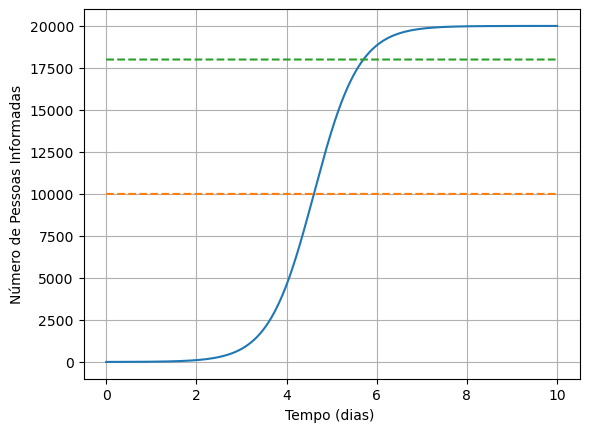

In [18]:

plt.plot(
    tabela[:,0],tabela[:,1],
    tabela[:,0], np.full( (m+1,1), 50/100 *p ), '--',
    tabela[:,0], np.full( (m+1,1), 90/100 *p ), '--')

plt.xlabel('Tempo (dias) ')
plt.ylabel('Número de Pessoas Informadas')
plt.grid(True)
plt.show()
